In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import geopy
from geopy import distance

In [2]:
#read the data set
df_train=pd.read_csv('train.csv')

df_aux_comm=pd.read_csv('./auxiliary-data/sg-commerical-centres.csv')
df_aux_gov=pd.read_csv('./auxiliary-data/sg-gov-markets-hawker-centres.csv')
df_aux_prim=pd.read_csv('./auxiliary-data/sg-primary-schools.csv')
df_aux_sec=pd.read_csv('./auxiliary-data/sg-secondary-schools.csv')
df_aux_shop=pd.read_csv('./auxiliary-data/sg-shopping-malls.csv')
df_aux_train=pd.read_csv('./auxiliary-data/sg-train-stations.csv')

In [8]:
# for visualization purpose, transfer the data to the point according to the coordinates
train_points=gpd.GeoDataFrame(df_train,geometry=gpd.points_from_xy(df_train.lng,df_train.lat,crs='epsg:4326'))
aux_points=[]
for df in [df_aux_comm,df_aux_gov,df_aux_prim,df_aux_sec,df_aux_shop,df_aux_train]:
    points=gpd.GeoDataFrame(df,geometry=gpd.points_from_xy(df.lng,df.lat,crs='epsg:4326'))
    aux_points.append(points)

In [6]:
# import pyproj
# pyproj.datadir.set_data_dir('D:\\anaconda3\\envs\\pytorch_gpu\\Library\\share\\proj')

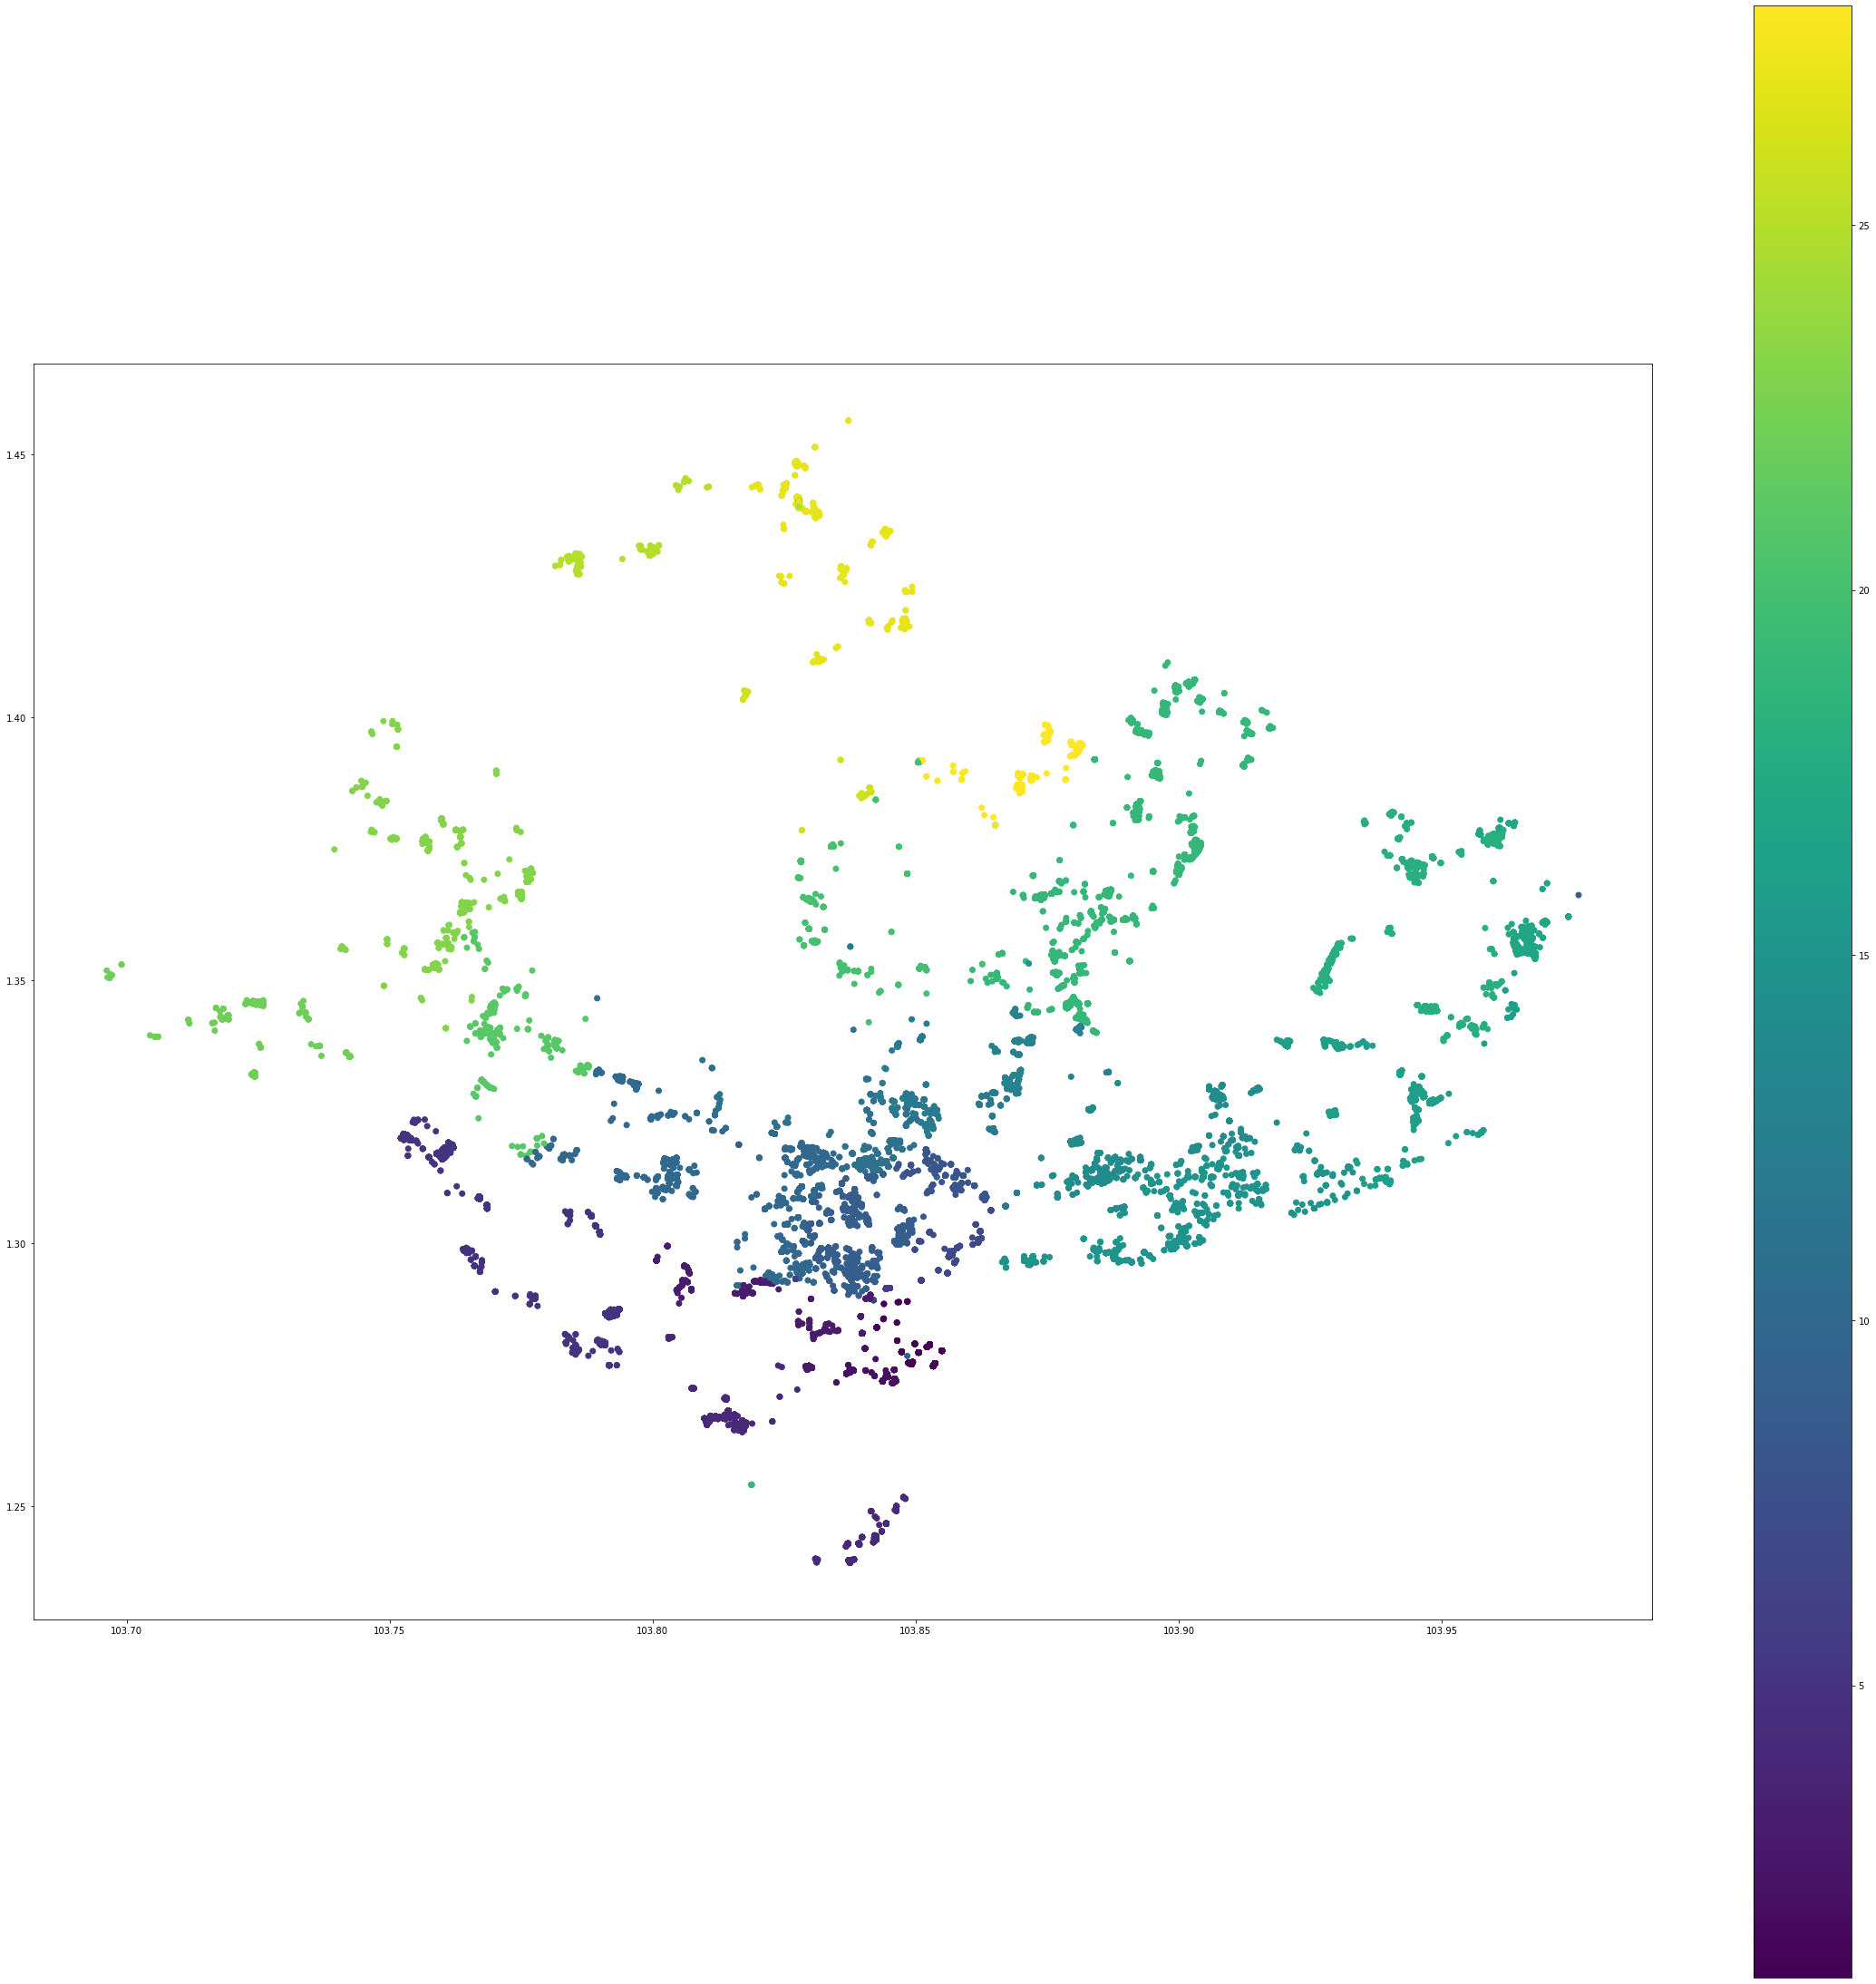

In [7]:
#visualize the points
fig, ax = plt.subplots(figsize = (40,40))
train_points.plot(ax=ax,aspect=1,legend=True,column='district')

# for i in range(len(aux_points)):
#     aux_points[i].plot(ax=ax,aspect=1,legend=True)

plt.show()

In [17]:
#calculate the distance matrix between train data set and other auxiliary data sets
def get_distance(df_train,df_aux):
    # using Vincenty distance instead of Haversine formula https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
    df_distance=pd.DataFrame(index=df_train.index,columns=df_aux.name)
    for i in range(len(df_train)):
        coords_1=(df_train.lat[i],df_train.lng[i])
        for j in range(len(df_aux)):
            coords_2=(df_aux.lat[j],df_aux.lng[j])
            distance=geopy.distance.distance(coords_1,coords_2).miles
            df_distance.iloc[i,j]=distance
    df_distance['listing_id']=df_train['listing_id']
    print('Finished calculating the distance.')
    return df_distance

In [5]:
%%time
distance_train=get_distance(df_train,df_aux_train)

Finished calculating the distance.
Wall time: 14min 19s


In [19]:
distance_train.to_csv('./distance/train-train-stations.csv')

In [20]:
aux_names=['commercial','gov-markets-hawker-centers','shopping-malls','secondary-schools','primary-schools','train-stations']
df_aux_list=[df_aux_comm,df_aux_gov,df_aux_shop,df_aux_sec,df_aux_prim,df_aux_train]

In [21]:
%%time
for i in range(len(df_aux_list)-1):
    df_aux=df_aux_list[i]
    df_distance=get_distance(df_train,df_aux)
    df_distance.to_csv(f'./distance/train-{aux_names[i]}.csv')

Finished calculating the distance.
Finished calculating the distance.
Finished calculating the distance.
Finished calculating the distance.
Finished calculating the distance.
Wall time: 59min 5s


In [22]:
df_test=pd.read_csv('test.csv')

In [23]:
%%time
for i in range(len(df_aux_list)):
    df_aux=df_aux_list[i]
    df_distance=get_distance(df_test,df_aux)
    df_distance.to_csv(f'./distance/test-{aux_names[i]}.csv')

Finished calculating the distance.
Finished calculating the distance.
Finished calculating the distance.
Finished calculating the distance.
Finished calculating the distance.
Finished calculating the distance.
Wall time: 21min 12s
